In [45]:
!git clone https://github.com/Deadoxide/Danishkin_Anton.git
%cd Danishkin_Anton

Cloning into 'Danishkin_Anton'...
remote: Enumerating objects: 39, done.
remote: Counting objects: 100% (39/39), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 39 (delta 4), reused 33 (delta 3), pack-reused 0 (from 0)
Receiving objects: 100% (39/39), 24.16 KiB | 12.08 MiB/s, done.
Resolving deltas: 100% (4/4), done.
/content/Danishkin_Anton/Danishkin_Anton/Danishkin_Anton/Danishkin_Anton


In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

pd.set_option("display.max_columns", 100)
pd.set_option("display.float_format", lambda x: f"{x:.3f}")


# **Загрузка данных и первичный осмотр**

In [47]:
data_path = "homeworks/HW02/S02-hw-dataset.csv"

df = pd.read_csv(data_path)

In [48]:
df.head()

,user_id,age,country,purchases,revenue
0,1,25.000,FR,7,749
1,2,24.000,RU,5,1115
2,3,52.000,FR,7,399
3,4,31.000,RU,6,654
4,5,NaN,DE,6,1296


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB


In [50]:
df.describe()

,user_id,age,purchases,revenue
count,41.000,39.000,41.000,41.000
mean,20.244,36.513,4.829,820.049
std,11.659,18.304,2.710,613.127
min,1.000,5.000,-1.000,0.000
25%,10.000,24.000,3.000,432.000
50%,20.000,33.000,5.000,693.000
75%,30.000,45.500,7.000,1115.000
max,40.000,120.000,11.000,2475.000


# **Пропуски, дубликаты, подозрительные значения**

In [51]:
df.isna().mean().sort_values(ascending=False)

,0
age,0.049
user_id,0.000
country,0.000
purchases,0.000
revenue,0.000


In [52]:
df[df.duplicated()].head()

,user_id,age,country,purchases,revenue
40,10,24.000,RU,7,511


In [53]:
df[df["age"] > 100]

,user_id,age,country,purchases,revenue
5,6,120.000,FR,-1,785


In [54]:
df[(df["purchases"] > 0) & (df["revenue"] == 0)]

,user_id,age,country,purchases,revenue
10,11,24.000,US,4,0


In [55]:
df[(df['purchases'] <= 0) & (df['revenue'] > 0)]

,user_id,age,country,purchases,revenue
5,6,120.000,FR,-1,785


В датасете обнаружены несколько проблем: пропуски в столбце age, одна дублирующая запись, а также ряд аномалий.
Отрицательное значение в purchases, нереалистичные значения возраста 120, случай, где при отрицательных покупках указана положительная прибыль, и ситуация, когда при четырёх покупках revenue равен нулю.

# **Минимальный EDA**

In [56]:
df["country"].value_counts() #Частоты категориального признака country

,count
country,
RU,13
FR,12
US,8
DE,6
CN,2


In [57]:
df.groupby("country")["revenue"].agg(["count", "mean", "min", "max"]) #Группировка revenue по странам

,count,mean,min,max
country,,,,
CN,2,1054.000,456,1652
DE,6,1445.500,702,2475
FR,12,675.917,0,1608
RU,13,790.077,0,2086
US,8,557.375,0,980


In [58]:
df.groupby("country")["purchases"].agg(["count", "mean"]) #Среднее количество покупок по странам


,count,mean
country,,
CN,2,4.500
DE,6,6.500
FR,12,4.250
RU,13,4.769
US,8,4.625


In [59]:
bins = [0, 18, 30, 45, 60, 120] #Средняя выручка по возрастным группам
labels = ["0–17", "18–29", "30–44", "45–59", "60+"]

df["age_group"] = pd.cut(df["age"], bins=bins, labels=labels, right=False)

df.groupby("age_group")["revenue"].mean()


/tmp/ipython-input-368192604.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("age_group")["revenue"].mean()


,revenue
age_group,
0–17,1488.000
18–29,604.000
30–44,1162.385
45–59,585.600
60+,NaN


Распределение по странам показывает, что больше всего пользователей из RU и FR. Наиболее высокая средняя выручка наблюдается у пользователей из DE и CN.
Количество покупок также варьируется между странами, но различия менее выражены. Анализ возрастных групп показывает, что максимальная средняя выручка приходится на возраст 30–44, что может указывать на их наибольшую покупательскую активность.

# **Визуализация данных в Matplotlib**

In [60]:
import os
os.makedirs("homeworks/HW02/figures", exist_ok=True)

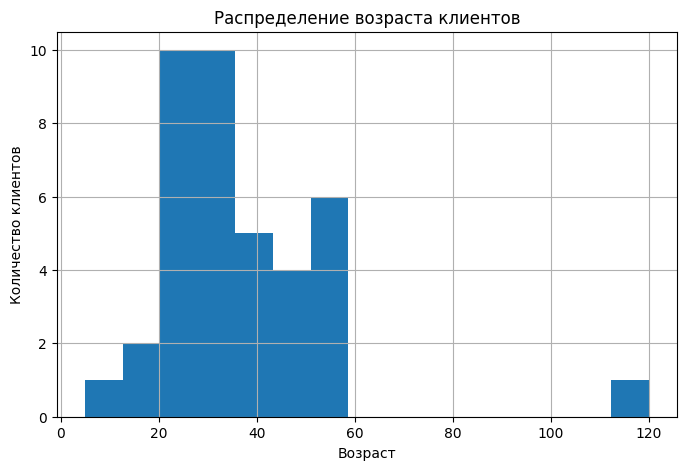

In [61]:
fig_hist, ax = plt.subplots(figsize=(8,5))
ax.hist(df["age"], bins=15)
ax.set_title("Распределение возраста клиентов")
ax.set_xlabel("Возраст")
ax.set_ylabel("Количество клиентов")
ax.grid(True)

fig_hist.savefig("homeworks/HW02/figures/histogram.png", dpi=300, bbox_inches="tight")
fig_hist.show()

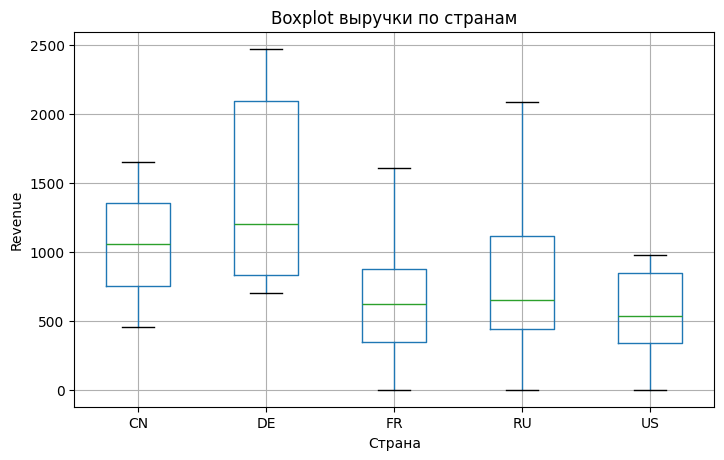

In [62]:
fig_box, ax = plt.subplots(figsize=(8,5))
df.boxplot(column="revenue", by="country", ax=ax)
ax.set_title("Boxplot выручки по странам")
plt.suptitle("")
ax.set_xlabel("Страна")
ax.set_ylabel("Revenue")
ax.grid(True)

fig_box.savefig("homeworks/HW02/figures/boxplot.png", dpi=300, bbox_inches="tight")
fig_box.show()


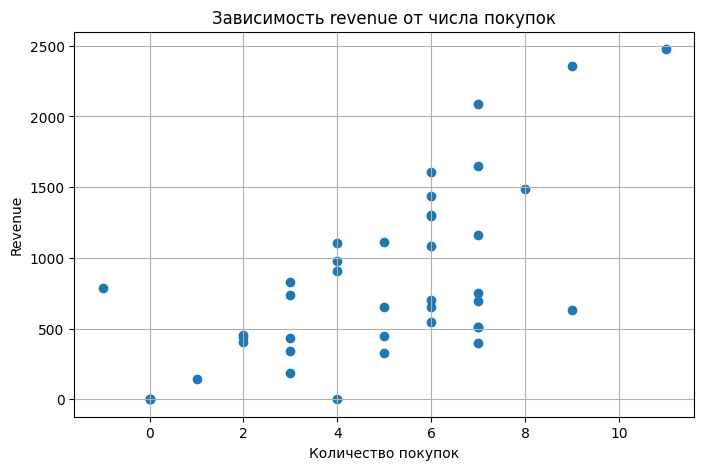

In [63]:
fig_scatter, ax = plt.subplots(figsize=(8,5))
ax.scatter(df["purchases"], df["revenue"])
ax.set_title("Зависимость revenue от числа покупок")
ax.set_xlabel("Количество покупок")
ax.set_ylabel("Revenue")
ax.grid(True)

fig_scatter.savefig("homeworks/HW02/figures/scatter_plot.png", dpi=300, bbox_inches="tight")
fig_scatter.show()


In [64]:
from google.colab import files

files.download("homeworks/HW02/figures/histogram.png")
files.download("homeworks/HW02/figures/boxplot.png")
files.download("homeworks/HW02/figures/scatter_plot.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>